In [1]:
import scipy,pprint
from pprint import pprint
import numpy as np
import pandas as pd
import math

In [2]:
train_data=pd.read_csv("train.csv",encoding="big5")
# out_example=pd.read_csv("sampleSubmission. csv")
train_data.describe()


,日期,測站,測項,0,1,2,3,4,5,6,...,14,15,16,17,18,19,20,21,22,23
count,4320,4320,4320,4320,4320,4320,4320,4320,4320,4320,...,4320,4320,4320,4320,4320,4320,4320,4320,4320,4320
unique,240,1,18,466,456,455,460,449,446,469,...,431,425,432,445,470,476,490,484,479,468
top,2014/12/19,大里,O3,NR,NR,NR,NR,NR,NR,NR,...,NR,NR,NR,NR,NR,NR,NR,NR,NR,NR
freq,18,4320,240,227,225,223,226,231,222,224,...,217,220,220,222,225,225,224,221,223,228


In [3]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,id_0,AMB_TEMP,35,35,35,34,33,31,30,29,29
1,id_0,CH4,1.6,1.7,1.7,1.6,1.6,1.6,1.7,1.7,1.7
2,id_0,CO,0.17,0.15,0.14,0.14,0.17,0.22,0.3,0.37,0.42
3,id_0,NMHC,0.02,0.01,0.01,0.01,0.03,0.04,0.08,0.13,0.11
4,id_0,NO,1.6,1.7,2,2.1,1.9,1.8,1.8,1.6,1.7


In [4]:
train_data.head(18)
train_data.tail(18)

,日期,測站,測項,0,1,2,3,4,5,6,...,14,15,16,17,18,19,20,21,22,23
4302,2014/12/20,大里,AMB_TEMP,14,14,14,14,15,15,15,...,22,21,20,18,17,16,15,13,12,12
4303,2014/12/20,大里,CH4,1.8,1.8,1.8,1.8,1.7,1.7,1.7,...,1.7,1.7,1.7,1.8,1.8,1.8,1.9,1.9,1.9,1.9
4304,2014/12/20,大里,CO,0.59,0.61,0.35,0.23,0.19,0.17,0.25,...,0.44,0.49,0.58,0.72,0.85,0.99,1.02,1,0.86,0.86
4305,2014/12/20,大里,NMHC,0.37,0.38,0.14,0.09,0.06,0.04,0.08,...,0.16,0.22,0.27,0.31,0.35,0.41,0.48,0.64,0.39,0.37
4306,2014/12/20,大里,NO,3.6,5.6,1.5,1,1,0.9,1.1,...,5.4,5.2,4.1,3.5,4.2,10,17,35,30,28
4307,2014/12/20,大里,NO2,23,27,18,11,8.9,7.8,11,...,19,23,28,37,43,46,43,39,32,29
4308,2014/12/20,大里,NOx,27,32,20,12,10,8.7,12,...,24,28,33,41,47,56,60,75,62,56
4309,2014/12/20,大里,O3,5.8,4.5,17,24,30,31,26,...,35,33,28,16,8.1,4.5,4.2,4.1,3.8,3.9
4310,2014/12/20,大里,PM10,37,25,20,18,20,23,24,...,38,47,49,50,51,48,58,72,86,89
4311,2014/12/20,大里,PM2.5,24,18,18,14,14,4,6,...,16,25,24,28,31,41,49,51,48,49


In [52]:
train_data.日期=pd.to_datetime(train_data.日期)
train_data_indexed=train_data.set_index(["日期","測項"]).drop("測站",axis=1)
# train_data_indexed.index=pd.to_datetime(train_data_indexed.index)
train_data_indexed=train_data_indexed.replace("NR",0)
train_data_indexed=train_data_indexed.drop(["WIND_DIREC"],level=1)

In [53]:
month_dr=pd.date_range("2013-12","2015-1",freq="M")
all_pm=pd.Series()
all_factor=pd.DataFrame()
train_x=[]
train_y=[]
for i in range(12):
    monthly_train_data=train_data_indexed[month_dr[i]:month_dr[i+1]]
    month_start=monthly_train_data.index.values[1][0]
    month_end=monthly_train_data.index.values[-1][0]
    day_dr=pd.date_range(month_start,month_end)
#     print(month_dr[i])
#     month_pm=pd.Series()
#     month_factor=pd.DataFrame()
    for day in day_dr:
        day_pm=train_data_indexed.loc[(day,"PM2.5")]
        day_factor=train_data_indexed.loc[day]
        all_pm=all_pm.append(day_pm,ignore_index=True)
        all_factor=pd.concat([all_factor,day_factor],axis=1,ignore_index=True)
    
all_pm=np.array(all_pm,dtype="f")
all_factor=np.array(all_factor,dtype="f")
factor_mean=np.apply_along_axis(np.mean,1,all_factor)
factor_std=np.apply_along_axis(np.std,1,all_factor)
# for i in range(18):
#     all_factor[i]=(all_factor[i]-factor_mean[i])/factor_std[i]
for i in range(12):
    for j in range(i*480,i*480+471):
        if all_pm[j+9]<120 and all_pm[j+9]>=0:
            if abs(all_pm[j+9]-all_pm[j+8])<40: #and abs(all_pm[j+9]-all_pm[j+10])<40:
                train_x.append(all_factor[:,j:j+9].reshape(1,-1)[0])
                train_y.append(all_pm[j+9])
    

        
        

In [54]:
pd.Series(train_y).describe()

count    5588.000000
mean       27.290086
std        18.355482
min         0.000000
25%        14.000000
50%        24.000000
75%        37.000000
max       118.000000
dtype: float64

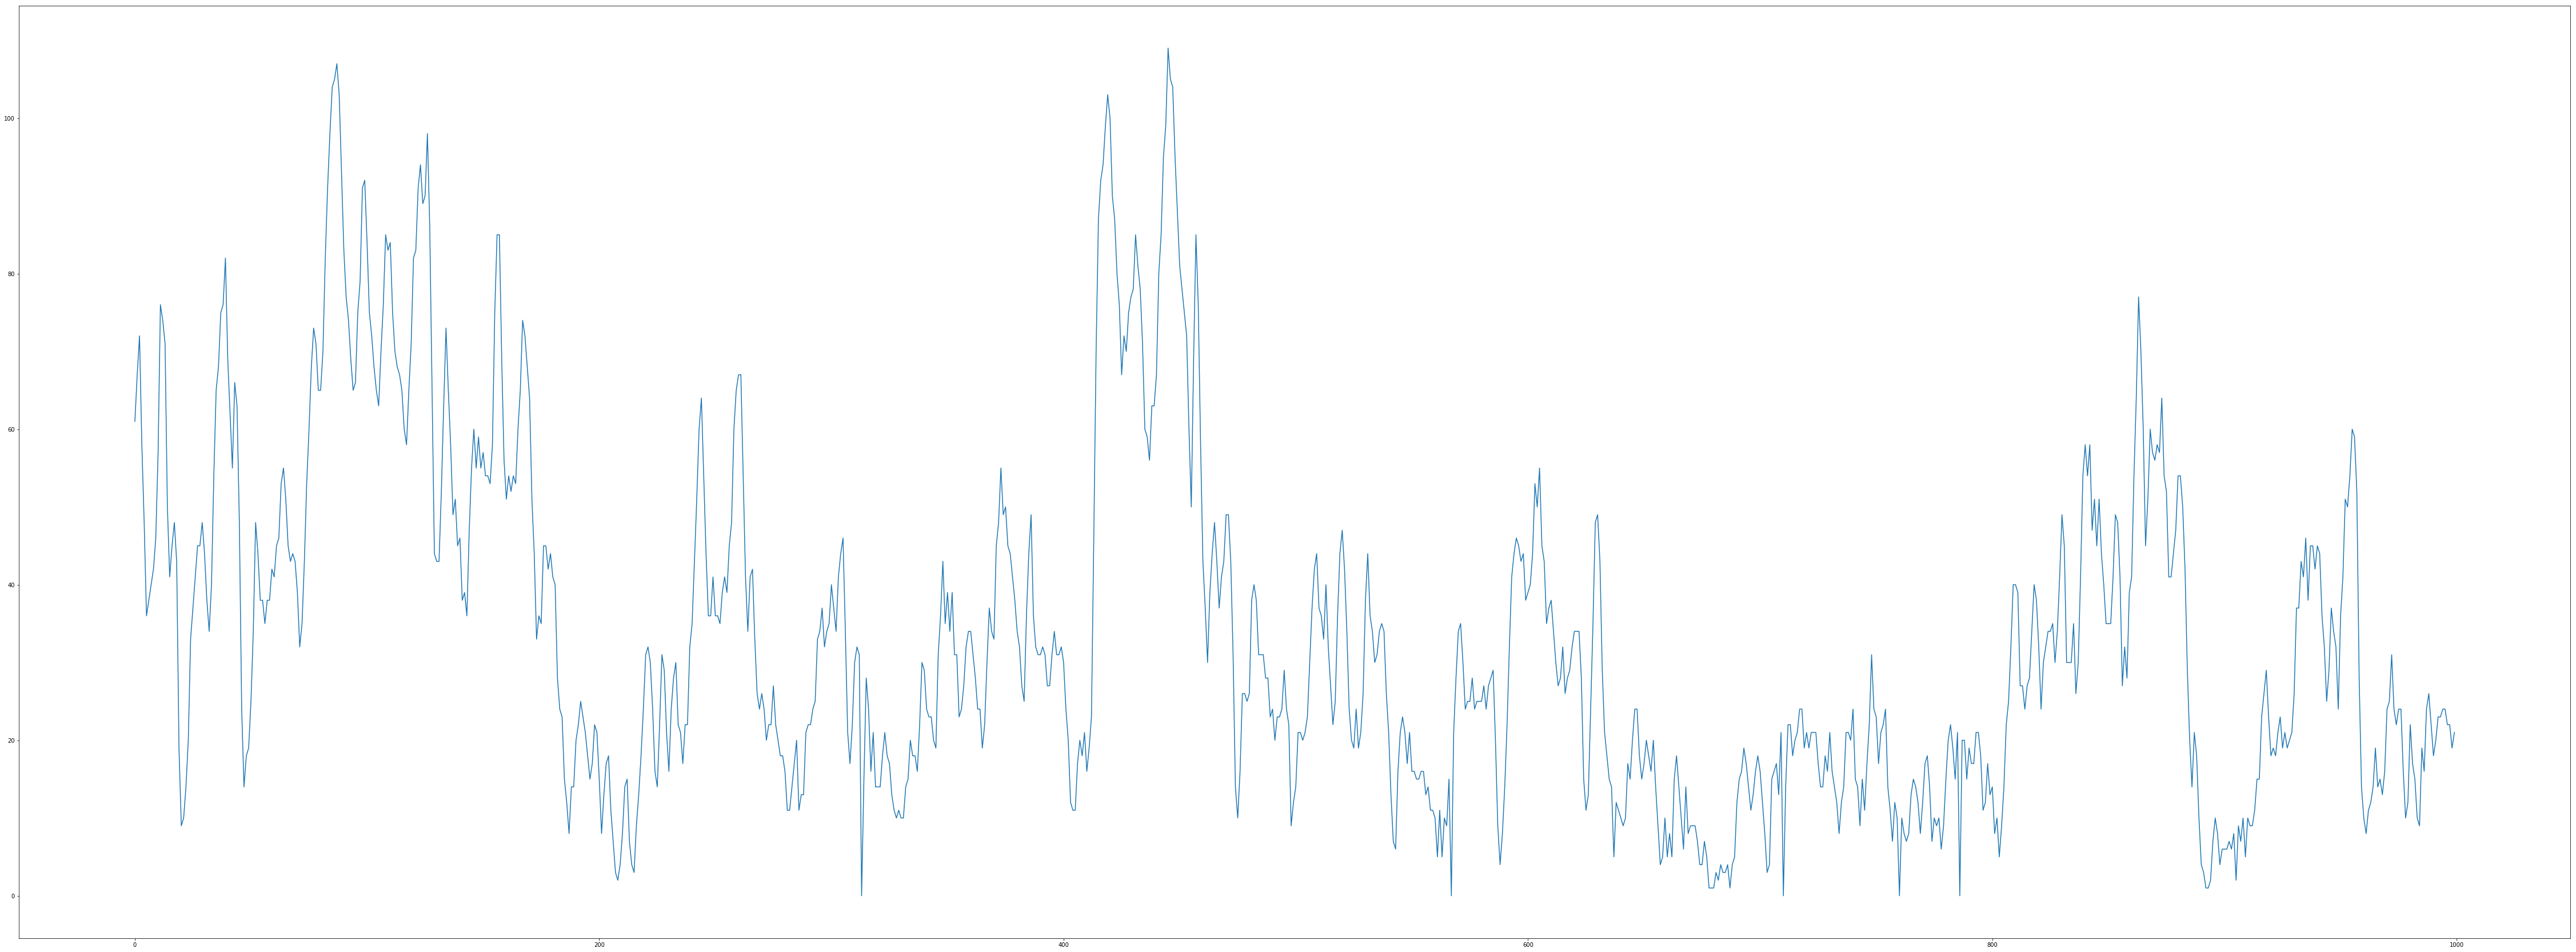

In [81]:
import matplotlib.pyplot as plt
plt.figure(figsize=(80,30))
plt.plot(train_y[:1000])
plt.show()

In [55]:
train_x=np.array(train_x)
train_y=np.array(train_y)
train_y=train_y.reshape(-1,1)
print(train_x.shape,train_y.shape)

(5588, 153) (5588, 1)


In [56]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

lm_min=np.min(train_x, axis=0)
lm_max=np.max(train_x,axis=0)
lm_train_x=(train_x - lm_min) / (lm_max - lm_min)
lm.fit(lm_train_x,train_y)
w_init=lm.coef_
b_init=lm.intercept_

In [61]:
class Linear_Regression_gradient():
    def __init__(self):
        pass
    def parameter_init(self, dim,w_init=None,b_init=None):
        self.W = w_init.reshape(dim,1)
       
        self.b = b_init[0]
        
        

    def feature_scaling(self, X, train=False):    
        if train:
            self.min = np.min(X, axis=0)
            self.max = np.max(X, axis=0)
        return (X - self.min) / (self.max - self.min)
    
    def z_feature_scaling(self,X,train=False):
        if train:
            self.mean=np.mean(X,axis=0)
            self.std=np.std(X,axis=0)
        return((X-self.mean)/self.std)
        
    def predict(self, X): 
        return np.dot(X, self.W) + self.b
        
    def RMSELoss(self, X, Y):
        return np.sqrt(np.mean((Y - self.predict(X))** 2) )
#         , valid_X, valid_Y
    def train(self, X, Y, epochs=30000, lr=0.1 ,feature_scaling="feature_scaling"): 
        
        batch_size = X.shape[0]
        W_dim = X.shape[1]
        self.parameter_init(W_dim,w_init=w_init,b_init=b_init)
        
        if feature_scaling=="z_feature_scaling":
            X = self.z_feature_scaling(X, train=True)
        else:
            X = self.feature_scaling(X, train=True)

            
        lr_b = 0
        lr_W = np.zeros((W_dim, 1))


        for epoch in range(epochs):
            if not epoch%1000:
                print(epoch,self.RMSELoss(X,Y))
            # mse loss
            grad_b = -np.sum(Y - self.predict(X))/ batch_size
            grad_W = -np.dot(X.T, (Y - self.predict(X))) / batch_size
            
            # adagrad
            lr_b += grad_b ** 2
            lr_W += grad_W ** 2
            
            #update
            self.b = self.b - lr / np.sqrt(lr_b) * grad_b
            self.W = self.W - lr / np.sqrt(lr_W) * grad_W


In [62]:
lr=Linear_Regression_gradient()
lr.train(train_x,train_y,epochs=500000,feature_scaling="feature_scaling")

0 5.6318455
1000 5.631845241937975
2000 5.6318452419283025
3000 5.631845241921792
4000 5.631845241917048
5000 5.631845241913508
6000 5.6318452419108285
7000 5.631845241908775
8000 5.631845241907183
9000 5.631845241905939
10000 5.631845241904953
11000 5.631845241904165
12000 5.631845241903529
13000 5.631845241903007
14000 5.631845241902578
15000 5.6318452419022185
16000 5.631845241901915
17000 5.631845241901655
18000 5.6318452419014315
19000 5.631845241901235
20000 5.631845241901064
21000 5.63184524190091
22000 5.631845241900773
23000 5.631845241900649
24000 5.631845241900535
25000 5.6318452419004315
26000 5.631845241900336
27000 5.6318452419002485
28000 5.631845241900165
29000 5.631845241900087
30000 5.631845241900015
31000 5.6318452418999465
32000 5.631845241899882
33000 5.6318452418998195
34000 5.631845241899762
35000 5.631845241899706
36000 5.6318452418996525
37000 5.631845241899601
38000 5.631845241899552
39000 5.631845241899505
40000 5.631845241899461
41000 5.631845241899417
42000

KeyboardInterrupt: 

In [63]:
print(lr.b)
lr.W

-1.4920102556901411


array([[ 3.18602134e+00],
       [-9.92838910e+00],
       [ 9.21035363e+00],
       [-5.83557590e+00],
       [ 4.85662658e+00],
       [ 4.02312527e+00],
       [-5.28890328e-01],
       [ 5.88840597e+00],
       [-1.18578704e+01],
       [ 2.83491478e+00],
       [ 1.56202532e+00],
       [-9.61537600e+00],
       [ 9.04570382e+00],
       [-1.54370054e+00],
       [ 1.77986796e+00],
       [-9.80465229e+00],
       [ 3.15329712e+00],
       [-2.13169140e+00],
       [ 1.37785705e+00],
       [ 4.43393061e+00],
       [-2.66380301e+00],
       [-1.10107196e+00],
       [-4.99820836e+00],
       [ 2.84377272e+00],
       [ 2.56383690e+00],
       [-6.75677043e+00],
       [ 1.65102589e+01],
       [-4.41334507e+00],
       [-2.19101264e+00],
       [-1.01013097e+01],
       [ 1.74052820e+01],
       [-8.52221742e+00],
       [ 2.58919972e+00],
       [-1.21596782e+01],
       [-1.51988131e+01],
       [ 1.12889703e+01],
       [ 5.32673778e+01],
       [-1.12904533e+01],
       [-7.1

In [64]:
test_data=pd.read_csv("test.csv",header=None)
test_data=test_data.set_index([1])
test_data=test_data.drop(['WIND_DIREC'])
test_data=test_data.set_index([0])
test_data.head()

,2,3,4,5,6,7,8,9,10
0,,,,,,,,,
id_0,35,35,35,34,33,31,30,29,29
id_0,1.6,1.7,1.7,1.6,1.6,1.6,1.7,1.7,1.7
id_0,0.17,0.15,0.14,0.14,0.17,0.22,0.3,0.37,0.42
id_0,0.02,0.01,0.01,0.01,0.03,0.04,0.08,0.13,0.11
id_0,1.6,1.7,2,2.1,1.9,1.8,1.8,1.6,1.7


In [65]:
test_data=test_data.replace("NR",0)
test_x=list()
for id_num in test_data.index.unique():
    temp_x=test_data.loc[id_num]
    temp_x=np.array(temp_x,dtype="f").reshape(1,-1)[0]
    test_x.append(temp_x)
test_x=np.array(test_x)
scaled_test_x=lr.feature_scaling(test_x)
scaled_test_x

array([[0.8333333 , 0.8333333 , 0.8333333 , ..., 0.08695652, 0.07826087,
        0.03913043],
       [0.5714286 , 0.5952381 , 0.5952381 , ..., 0.1521739 , 0.15652174,
        0.13913044],
       [0.5952381 , 0.5952381 , 0.5952381 , ..., 0.04347826, 0.02608696,
        0.04782609],
       ...,
       [0.61904764, 0.5714286 , 0.5714286 , ..., 0.1347826 , 0.06956522,
        0.08695652],
       [0.6904762 , 0.7380952 , 0.71428573, ..., 0.05217392, 0.02608696,
        0.01304348],
       [0.5       , 0.5       , 0.5       , ..., 0.01739131, 0.03913043,
        0.05652174]], dtype=float32)

In [82]:
value_closed_form=lm.predict(test_x).reshape(1,-1)[0]

In [66]:
value=lr.predict(scaled_test_x).reshape(1,-1)[0]
result=pd.DataFrame({"id":test_data.index.unique(),"value":value})
result.to_csv("result.csv",index=False)
result

,id,value
0,id_0,38.606601
1,id_1,13.670604
2,id_2,6.310113
3,id_3,18.579795
4,id_4,25.591505
5,id_5,106.015451
6,id_6,25.742237
7,id_7,34.194521
8,id_8,43.409661
9,id_9,19.391328
